In [ ]:
#Stock Price Prediction for NETFLIX


In [ ]:
!nvidia-smi

Fri Sep 25 14:00:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    76W / 149W |    253MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Importing the Required Libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
#Reading the Dataset
data=pd.read_csv("/content/NFLX (3).csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-25,7.292857,7.357143,6.931428,7.018571,7.018571,13791400
1,2010-01-26,6.960000,7.178571,6.937143,7.135714,7.135714,11343500
2,2010-01-27,7.142857,7.311429,6.992857,7.281428,7.281428,23347100
3,2010-01-28,8.812857,9.121428,8.675714,9.005714,9.005714,77352800
4,2010-01-29,8.962857,9.224286,8.792857,8.892858,8.892858,24604300
...,...,...,...,...,...,...,...
2682,2020-09-18,472.510010,479.399994,458.600006,469.959991,469.959991,6717700
2683,2020-09-21,467.690002,487.779999,466.320007,487.350006,487.350006,5457500
2684,2020-09-22,489.010010,491.820007,479.260010,491.170013,491.170013,3482300
2685,2020-09-23,491.040009,491.040009,469.000000,470.609985,470.609985,3726400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2687 non-null   object 
 1   Open       2687 non-null   float64
 2   High       2687 non-null   float64
 3   Low        2687 non-null   float64
 4   Close      2687 non-null   float64
 5   Adj Close  2687 non-null   float64
 6   Volume     2687 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 147.1+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2687.000000,2687.000000,2687.000000,2687.000000,2687.000000,2.687000e+03
mean,137.430478,139.629109,135.140373,137.489614,137.489614,2.084561e+07
std,137.090378,139.331480,134.696416,137.137456,137.137456,2.158254e+07
min,6.960000,7.178571,6.931428,7.018571,7.018571,1.616300e+06
25%,29.767142,30.319285,29.152857,29.808571,29.808571,7.863800e+06
50%,86.669998,88.389999,85.110001,86.349998,86.349998,1.463980e+07
75%,244.849999,255.044998,234.894997,247.930000,247.930000,2.611105e+07
max,567.979980,575.369995,537.369995,556.549988,556.549988,3.155418e+08


In [ ]:
train = data.iloc[:,1:5]
train

,Open,High,Low,Close
0,7.292857,7.357143,6.931428,7.018571
1,6.960000,7.178571,6.937143,7.135714
2,7.142857,7.311429,6.992857,7.281428
3,8.812857,9.121428,8.675714,9.005714
4,8.962857,9.224286,8.792857,8.892858
...,...,...,...,...
2682,472.510010,479.399994,458.600006,469.959991
2683,467.690002,487.779999,466.320007,487.350006
2684,489.010010,491.820007,479.260010,491.170013
2685,491.040009,491.040009,469.000000,470.609985


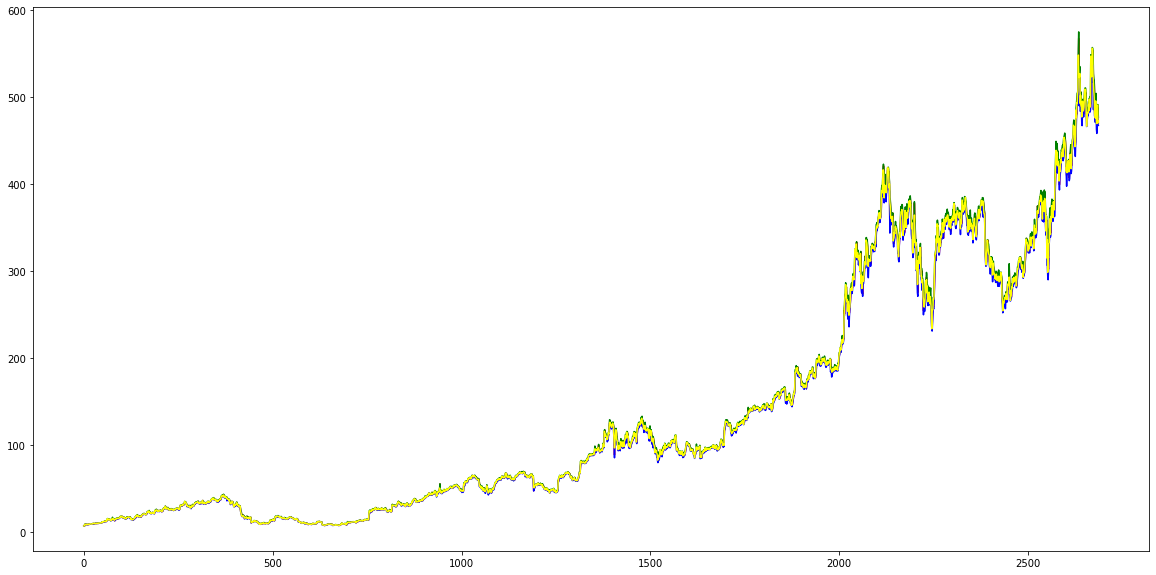

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(train.Open.values, color='red', label='open')
plt.plot(train.High.values, color='green', label='high')
plt.plot(train.Low.values, color='blue', label='low')
plt.plot(train.Close.values, color='yellow', label='close')
plt.show()

In [ ]:
cols = list(train.columns.values)
print(cols)

['Open', 'High', 'Low', 'Close']


In [ ]:
temp= MinMaxScaler(feature_range = (0,1))
train_scaled = temp.fit_transform(train)
train_scaled

array([[5.93306855e-04, 3.14281407e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.07741035e-05, 2.13168886e-04],
       [3.25936698e-04, 2.33826127e-04, 1.15807944e-04, 4.78329340e-04],
       ...,
       [8.59238578e-01, 8.52954507e-01, 8.90449171e-01, 8.81025956e-01],
       [8.62856986e-01, 8.51581734e-01, 8.71106667e-01, 8.43612212e-01],
       [8.26298555e-01, 8.26871736e-01, 8.68882106e-01, 8.48106954e-01]])

In [ ]:
#size of window=40
f_data=[]
for i in range(len(train_scaled)-40):
  f_data.append(train_scaled[i:i+40])
f_data=np.array(f_data)
f_data.shape

(2647, 40, 4)

In [ ]:
test=int(np.round(0.1*f_data.shape[0]))
# valid=int(np.round(0.1*f_data.shape[0]))
train=f_data.shape[0]-test
print(test,train)

265 2382


In [ ]:
x_train=f_data[:train,:-1,:]
y_train=f_data[:train,-1,:]
# x_valid=f_data[train:train+valid,:-1,:]
# y_valid=f_data[train:train+valid,-1,:]
x_test=f_data[train:,:-1,:]
y_test=f_data[train:,-1,:]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2382, 39, 4) (2382, 4) (265, 39, 4) (265, 4)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import metrics

In [ ]:
model= Sequential()
model.add(LSTM(units = 500, return_sequences = True, input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 400, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 400, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 400, return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 200))
model.add(Dropout(0.1))
model.add(Dense(units = 4))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics =[metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 39, 500)           1010000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 39, 500)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 39, 400)           1441600   
_________________________________________________________________
dropout_6 (Dropout)          (None, 39, 400)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 39, 400)           1281600   
_________________________________________________________________
dropout_7 (Dropout)          (None, 39, 400)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 39, 400)          

In [ ]:
history=model.fit(x_train,y_train,epochs = 500,validation_data=(x_test,y_test), batch_size = 32)

Epoch 1/500
75/75 [==============================] - 9s 115ms/step - loss: 0.0336 - root_mean_squared_error: 0.1834 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590
Epoch 2/500
75/75 [==============================] - 7s 91ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641
Epoch 3/500
75/75 [==============================] - 7s 89ms/step - loss: 9.7589e-04 - root_mean_squared_error: 0.0312 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0554
Epoch 4/500
75/75 [==============================] - 7s 90ms/step - loss: 0.0013 - root_mean_squared_error: 0.0359 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1321
Epoch 5/500
75/75 [==============================] - 7s 90ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0582
Epoch 6/500
75/75 [==============================] - 7s 90ms/step - loss: 9.7367e-04 - root_mean_squared_error: 0.0312 - val_loss: 0.00

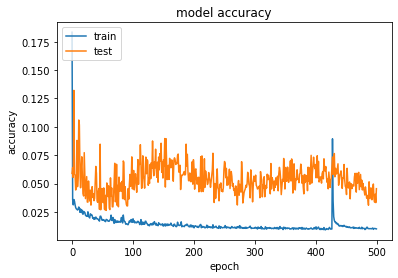

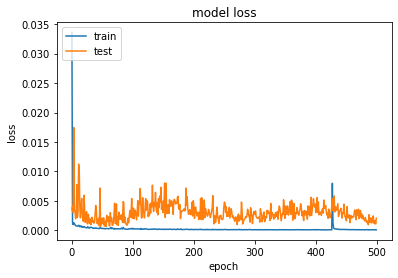

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model1.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
test=f_data[-1:,1:,:]
for i in range(2,12):
  j=0
  prediction=model.predict(test)
  test=test[:,i:,:]
  test=np.append(test,prediction.reshape(1,1,4),axis=1)
  prediction=temp.inverse_transform(prediction)
  print("Day ",i-1,':')
  print('OPEN :',prediction[0][j])
  j+=1
  print('HIGH :',prediction[0][j])
  j+=1
  print('LOW :',prediction[0][j])
  j+=1
  print('CLOSED :',prediction[0][j])


Day  1 :
OPEN : 440.65952
HIGH : 445.60416
LOW : 432.6098
CLOSED : 439.05194
Day  2 :
OPEN : 433.3807
HIGH : 438.13126
LOW : 425.6253
CLOSED : 431.82498
Day  3 :
OPEN : 421.80032
HIGH : 426.8139
LOW : 414.2123
CLOSED : 420.50986
Day  4 :
OPEN : 402.52835
HIGH : 407.87985
LOW : 395.18588
CLOSED : 401.54062
Day  5 :
OPEN : 390.7624
HIGH : 396.4108
LOW : 383.49316
CLOSED : 389.99982
Day  6 :
OPEN : 386.6576
HIGH : 392.1256
LOW : 379.6355
CLOSED : 385.94748
Day  7 :
OPEN : 374.1535
HIGH : 379.5642
LOW : 367.3773
CLOSED : 373.56778
Day  8 :
OPEN : 386.4944
HIGH : 391.37134
LOW : 379.80704
CLOSED : 385.77402
Day  9 :
OPEN : 438.18408
HIGH : 439.2095
LOW : 433.63852
CLOSED : 436.78085
Day  10 :
OPEN : 354.84366
HIGH : 355.75516
LOW : 352.44986
CLOSED : 354.98773
